In [12]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [3]:
final_df = pd.read_csv('final.csv')
out_of_sample = pd.read_csv('Out_of_Sample.csv')

In [4]:
final_df.sample(10)

,Visitor-Points,Home-Points,Overtime,Age_Visitor,W_Visitor,L_Visitor,PW_Visitor,PL_Visitor,MOV_Visitor,SOS_Visitor,...,T_DRB_Home,T_TRB_Home,T_AST_Home,T_STL_Home,T_BLK_Home,T_TOV_Home,T_PF_Home,T_PTS_Home,elo_diff,score_gap_sign
1088,111,106,0,25.7,39,43,38,44,-0.90,0.52,...,34.1,44.1,20.2,6.1,5.5,11.9,18.2,94.2,-89.972522,-5
2858,105,102,0,26.9,45,37,46,36,1.71,-0.09,...,33.0,43.3,23.6,8.2,5.1,14.1,20.7,102.1,-106.024128,-3
895,100,117,0,25.0,40,42,41,41,0.16,-0.56,...,32.1,42.6,21.7,8.5,4.2,13.3,19.1,98.3,291.277794,17
210,101,90,0,26.0,36,46,35,47,-2.15,0.75,...,29.3,41.1,21.5,6.6,4.9,15.1,20.9,95.5,-164.132056,-11
4800,110,107,0,24.7,55,27,51,31,3.59,-0.35,...,32.8,41.9,23.7,7.8,4.2,15.6,19.6,103.4,-203.559767,-3
5521,96,111,0,25.1,28,54,31,51,-3.74,0.07,...,35.4,45.5,21.6,6.8,4.5,12.7,17.2,108.2,139.263420,15
5374,113,115,0,29.8,65,17,61,21,8.48,-0.27,...,35.7,44.3,26.8,8.0,5.9,14.9,19.1,111.7,-105.264544,2
4982,111,116,0,26.0,22,60,25,57,-6.21,0.39,...,33.7,42.1,23.4,7.1,3.8,13.7,18.6,110.9,215.755614,5
122,119,108,0,26.8,27,55,25,57,-6.29,0.96,...,32.1,44.1,21.2,7.1,3.7,14.2,20.0,98.2,-2.091224,-11
3395,80,116,0,29.5,43,39,42,40,0.49,0.47,...,31.0,42.4,23.7,8.0,4.5,14.0,20.1,105.6,-54.691925,36


In [5]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [6]:
X = final_df.drop(['score_gap_sign'], axis = 1)
y = final_df['score_gap_sign']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 66)

In [7]:
lassoreg = linear_model.Lasso(alpha=1)
lassoreg.fit(X_train, y_train)
print(lassoreg.coef_)
print(lassoreg.intercept_)
pred = lassoreg.predict(X_test)
error = np.sqrt(mean_squared_error(y_test, pred))
print(error)

[-9.86809086e-01  9.86467624e-01 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000

In [23]:
# out-of-sample prediction
X_out = out_of_sample.drop(['score_gap_sign'], axis = 1)
y_out = out_of_sample['score_gap_sign']
lassoreg.fit(X,y)
pred = lassoreg.predict(X_out)
error = np.sqrt(mean_squared_error(y_out, pred))
print(pred)
print(error)

[ 17.8188621    8.0070291   -0.99924298   3.04209929 -18.66966758
  27.79253831  -8.87420934  18.7715526    2.9248666   20.72884351
  -6.005919     4.00787828  11.86794771  18.89068015   8.96852017
  -0.95898025   2.02685364  15.80145944  13.82203842  16.79355758
   7.88253538  19.8742405  -31.58466951  11.86454039  -1.01493704
  -2.0063898    3.88649916  27.80631618  19.85199815  -8.9763485
  -0.93928856  -2.07831883   1.14733846  12.86251765  -3.98218226
 -21.55776725   1.94048946   2.91541968 -10.74714687  -2.78620372
   5.96234666  19.98716814  -1.02844318  10.9857844    9.88765129
  -0.91955378  20.83101188  -7.71406576  13.94037108   0.96865062
   6.98483295   6.95947679   1.96136519 -15.65094898  21.85201292
 -10.77709942  22.8032968   14.8198038  -17.80931082   5.00931419
 -19.69563548   6.99195742   6.90071241   6.87217048  -5.9230596
 -13.89007354  28.69065726 -19.6320229  -29.58611904   2.121498
 -27.78829099   3.948679     9.05444805 -11.79012229 -11.80583172
 -19.75833646 

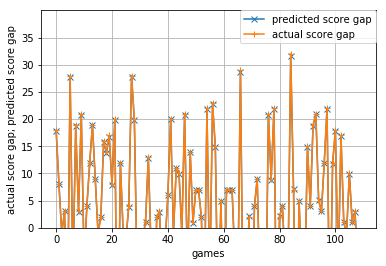

In [20]:
# Visulization of prediction 
pred_list = list(pred)
y_out_list = list(y_out)
fig, ax = plt.subplots()
plt.xlabel('games')
plt.ylabel('actual score gap; predicted score gap')
yticks = range(0,40,5)
ax.set_yticks(yticks)
ax.set_ylim([0,40])
x = list(range(len(out_of_sample)))
plt.plot(x,pred_list,"x-",label="predicted score gap")
plt.plot(x,y_out_list,"+-",label="actual score gap")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.0, 1), loc=1, borderaxespad=0.)